In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
# Load Data
data = pd.read_csv('FuelConsumption.csv')
data.head()
features = data[['ENGINESIZE','FUELCONSUMPTION_CITY']]
target = data[['CO2EMISSIONS']]

In [55]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
features.iloc[:, 0] = scaled[:,0]
features.iloc[:, 1] = scaled[:,1]
features.head()


,ENGINESIZE,FUELCONSUMPTION_CITY
0,-0.951292,-0.828558
1,-0.668653,-0.511433
2,-1.304591,-1.779932
3,0.108606,-0.145519
4,0.108606,-0.291885


In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
target.iloc[:,0] = encoder.fit_transform(target)
target

,CO2EMISSIONS
0,36
1,49
2,6
3,70
4,63
...,...
1062,81
1063,76
1064,81
1065,74


In [57]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target,
                                test_size=0.2, random_state=42)

Modeling

In [58]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(xtrain, ytrain)

KNeighborsRegressor()

In [59]:
ypred = model.predict(xtest)
ypred == ytest.values.ravel()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
ypred = model.predict(xtest)
mean_squared_error(ytest, ypred), r2_score(ytest, ypred)


(68.62392523364487, 0.9477434761929371)

In [61]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, features, target, cv= 4)
cv, cv.mean()

(array([0.90099925, 0.92222513, 0.91340639, 0.94519422]), 0.920456249383835)

In [62]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [63]:
model = KNeighborsRegressor()

In [66]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    model, param_grid={
        'n_neighbors': [5,7,9,11,14,15,17,19],
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'metric': ['minkowski', 'euclidean', 'manhattan', 'hamming', 'chebyshev'],
        'weights': ['uniform', 'distance']
    }, cv=10, scoring='accuracy'
)
grid.fit(features, target)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'hamming', 'chebyshev'],
                         'n_neighbors': [5, 7, 9, 11, 14, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [67]:
grid.best_params_

{'algorithm': 'ball_tree',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'uniform'}

In [68]:
best_model = grid.best_estimator_
best_model

KNeighborsRegressor(algorithm='ball_tree')

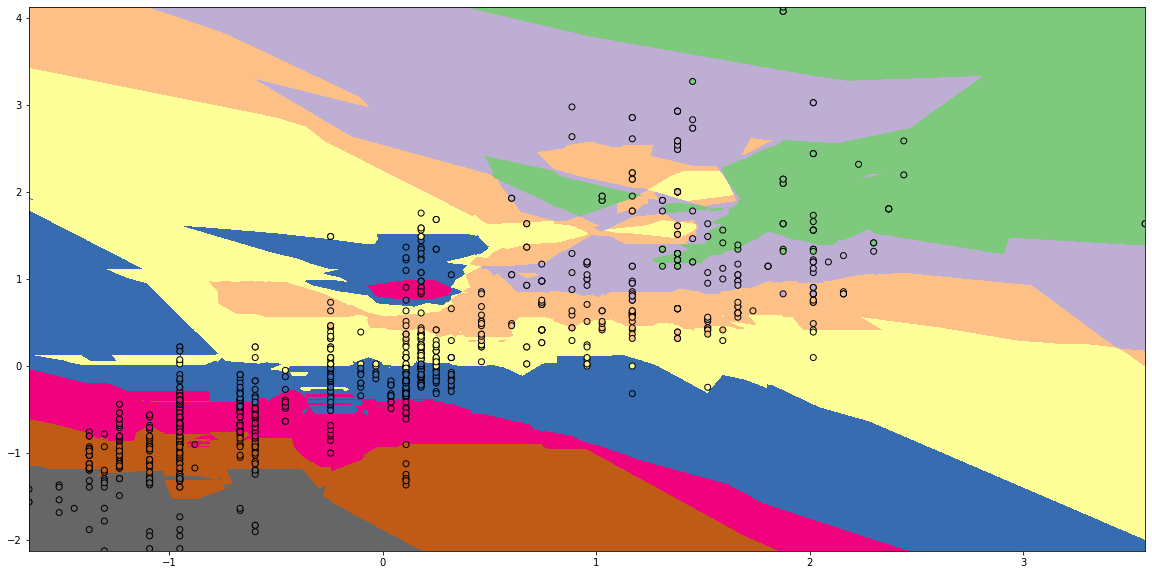

In [72]:
xmin, xmax = features.ENGINESIZE.values.min(), features.ENGINESIZE.values.max()
ymin, ymax = features.FUELCONSUMPTION_CITY.values.min(), features.FUELCONSUMPTION_CITY.values.max()

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.001), np.arange(ymin, ymax, 0.001)
)

grid = np.c_[xx.ravel(), yy.ravel()]
y_pred = best_model.predict(grid)
y_pred = y_pred.reshape(yy.shape)

predictions = best_model.predict(features)

plt.figure(1, figsize=(20, 10))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, y_pred)
plt.scatter(features.ENGINESIZE, features.FUELCONSUMPTION_CITY, c=predictions, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

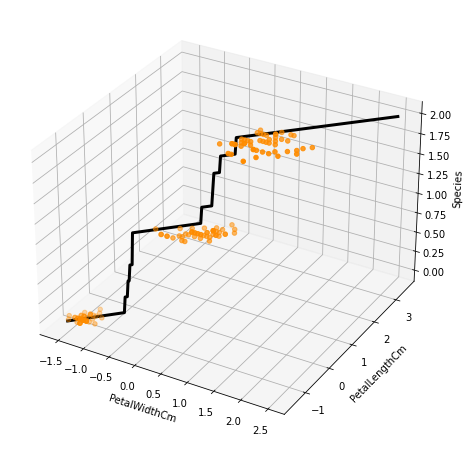

In [30]:
dummy_e = np.linspace(-1.5, 2.5, 300)
dummy_f = np.linspace(-1.5, 3.5, 300)
dummy_feature =np.c_[dummy_e, dummy_f]
plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(
    features.values[:,0], features.values[:,1], target, color='darkorange'
)
axes.plot3D(
    dummy_e, dummy_f, model.predict(dummy_feature).ravel(), color='black', linewidth=3
)
axes.set_xlabel('ENGINESIZE')
axes.set_ylabel('FUELCONSUMPTION_CITY')
axes.set_zlabel('CO2EMISSIONs')
plt.show()